## ------- SCC-ICMC-USP - 2025/2 -------

**SCC0275** - Introdução a Ciencia de Dados

**Profª Roseli A. F. Romero**  
**Monitores:**
- Thiago Rafael
- Paulo Henrique

#### Atividade 3 - 25/08/2025

**Formalização do Grupo (Nome e NUSP)**
- Integrante 1: Pedro Guilherme de Barros Zenatte - 13676919
- Integrante 2:

---

Para esta lista de exercícios, considere a base de dados __wine classification__, disponibilizada no [repositório da UCI](https://archive.ics.uci.edu/dataset/109/wine). O arquivo do conjunto está disponível tanto no Tidia com o nome de __wine.data__ ou através da biblioteca oficial da universidade (o passo-a-passo para instalação está disposto a seguir):

```bash
pip install ucimlrepo
```

```python
from ucimlrepo import fetch_ucirepo
wine = fetch_ucirepo(id=109)
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Celula de importacoes mais utilizadas (sinta-se livre para adicionar mais)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Para comodidade dos alunos que optarem por baixar o arquivo do conjunto, cujo as colunas das variáveis estão omissas, deixarei aqui disponibilizado uma cécula contendo o nome das colunas em ordem para formação do DataFrame.

In [ ]:
df_cols_names = [
    "class", "Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols",
    "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue",
    "0D280_0D315_of_diluted_wines", "Proline"
    ]

---
### Item 1
Calcule média, mediana, mínimo, máximo, variância, desvio padrão e coeficiente de variação para as variáveis Alcohol, Malicacid e Proline.

- apresentar as estatísticas em uma tabela.
- compare os resultados e discuta qual variável apresenta maior variabilidade relativa.

In [ ]:
# Carregar arquivo CSV
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.data")

from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
dados = wine.frame

dados = dados.rename(columns={"alcohol":"Alcohol", "malic_acid":"Malicacid", "proline":"Proline"})

# Selecionar apenas colunas de interesse
colunas = ["Alcohol", "Malicacid", "Proline"]
df_sel = dados[colunas]

# Calculos estatísticos
estatisticas = pd.DataFrame({
    "Média": df_sel.mean(),
    "Mediana": df_sel.median(),
    "Mínimo": df_sel.min(),
    "Máximo": df_sel.max(),
    "Variância": df_sel.var(),
    "Desvio Padrão": df_sel.std(),
    "Coef. Variação (%)": (df_sel.std()/df_sel.mean())*100
})

import numpy as np
estatisticas

,Média,Mediana,Mínimo,Máximo,Variância,Desvio Padrão,Coef. Variação (%)
Alcohol,13.000618,13.050,11.03,14.83,0.659062,0.811827,6.244523
Malicacid,2.336348,1.865,0.74,5.80,1.248015,1.117146,47.815905
Proline,746.893258,673.500,278.00,1680.00,99166.717355,314.907474,42.162313


A variável Alcohol apresenta uma variabilidade relativa baixa, já que seu coeficiente de variação é de apenas 6,24%. Em contraste, a variável Malicacid demonstra a maior dispersão relativa, com coeficiente de 47,8%, o que indica que seus valores variam de forma bastante significativa em relação à média. Já a variável Proline, embora possua o maior desvio padrão absoluto, em torno de 315, também apresenta uma média muito elevada, o que faz com que seu coeficiente de variação seja menor que o observado em Malicacid, mas ainda sim é alto.

### Item 2
Para a variável _Alcohol_, calcule os percentis 10, 25, 50, 75 e 90, mostrando os valores obtidos.
Explique o que significa dizer que um vinho está no percentil 75 da variável Alcohol.

In [ ]:
# Cálculo dos percentis
percentis = dados["Alcohol"].quantile([0.10, 0.25, 0.50, 0.75, 0.90])

# Tabela
tabela_percentis = pd.DataFrame({
    "Percentil": ["10%", "25%", "50%", "75%", "90%"],
    "Valor": percentis.values
})

print(tabela_percentis.to_string(index=False))

Percentil   Valor
      10% 11.9330
      25% 12.3625
      50% 13.0500
      75% 13.6775
      90% 14.1000


Dizer que um vinho está no percentil 75 da variável Alcohol significa que 75% dos vinhos do conjunto possuem teor alcoólico menor ou igual a 13,6775, e apenas 25% dos vinhos possuem teor alcoólico maior que esse valor, ou seja, um vinho no percentil 75 está entre os vinhos com maior teor alcoólico da amostra.

### Item 3
Construa um boxplot para a variável _Proline_, separando os vinhos de acordo com a variável class. Visualize com um boxplot agrupado.  
Discuta; há diferenças marcantes entre os três tipos de vinho em relação ao teor de _Proline_. Quais classes apresentam valores atípicos?

<Figure size 800x600 with 0 Axes>

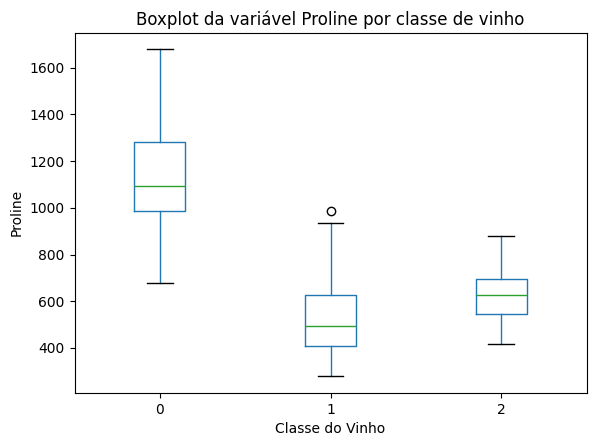

In [ ]:

# Boxplot da variável Proline separado pela classe
plt.figure(figsize=(8,6))
dados.boxplot(column="Proline", by="target", grid=False)
plt.title("Boxplot da variável Proline por classe de vinho")
plt.suptitle("")
plt.xlabel("Classe do Vinho")
plt.ylabel("Proline")
plt.show()

No boxplot da variável Proline por classe de vinho, nota-se que a Classe 0 apresenta valores mais elevados em média, com a mediana bem acima das demais. A Classe 1 concentra os valores mais baixos, sendo o grupo com menor Proline, enquanto a Classe 2 ocupa uma posição intermediária entre as duas.

As diferenças entre as classes são marcantes, pois há uma separação clara: a Classe 0 possui as maiores concentrações de Proline, a Classe 1 as menores, e a Classe 2 concentra valores medianos. Esse comportamento indica que a variável Proline possui forte poder discriminativo entre os tipos de vinho.

Em relação aos valores atípicos, apenas a classe 1 de vinho possui outliers (um único).

### Item 4

Calcule os valores de assimetria e curtose para as variáveis __Alcohol__, __Flavanoids__ e __Color_intensity__ e apresente os valores em uma tabela.  
Interprete os resultados, explicando se as distribuições são simétricas ou assimétricas, e se são mais achatadas ou mais concentradas do que uma distribuição normal.

In [ ]:
# Selecionar colunas de interesse
colunas_ac = ["Alcohol", "flavanoids", "color_intensity"]
df_sel2 = dados[colunas_ac]

# Calcular assimetria e curtose
estatisticas2 = pd.DataFrame({
    "Assimetria": df_sel2.skew(),
    "Curtose": df_sel2.kurt()
})

estatisticas2

,Assimetria,Curtose
Alcohol,-0.051482,-0.852500
flavanoids,0.025344,-0.880382
color_intensity,0.868585,0.381522


A variável Alcohol apresenta assimetria próxima de zero, o que indica uma distribuição praticamente simétrica. Sua curtose é negativa (-0,85), revelando que a distribuição é mais achatada que a normal.

A variável Flavanoids também apresenta simetria, com assimetria próxima de zero, e curtose negativa (-0,88), o que igualmente aponta o mesmo caso que o da variável Alcohol.

Já a variável Color_intensity possui assimetria positiva (0,87), indicando uma cauda mais longa à direita. Além disso, sua curtose é levemente positiva (0,38), o que sugere uma distribuição mais concentrada nas caudas do que a normal.

### Item 5

A variável __Proline__ apresenta grande amplitude e variabilidade. Aplique uma transformação logarítmica a essa variável e compare estatísticas de dispersão (média, mediana, desvio padrão e IQR) antes e depois da transformação.

Plote histogramas ou boxplots da variável original e transformada e explique como a transformação altera a percepção da distribuição e se ajuda a lidar com a dispersão e os outliers.

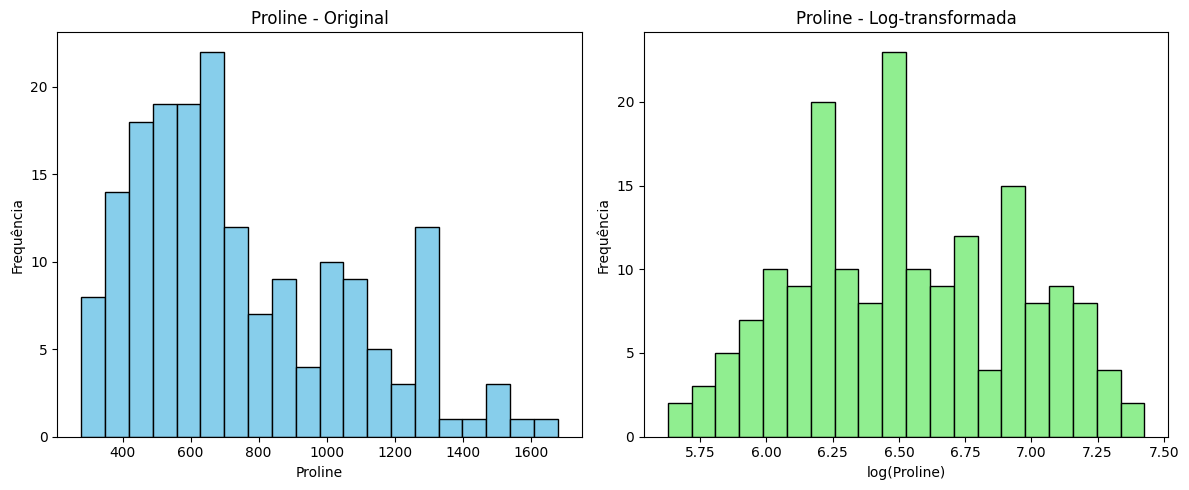

,Média,Mediana,Desvio Padrão,IQR
Original,746.893258,673.500000,314.907474,484.500000
Log-transformada,6.530303,6.512486,0.415107,0.677036


In [ ]:
# Variável original e transformada
proline_original = dados["Proline"]
proline_log = np.log(proline_original)

# Estatísticas antes e depois
estat_disp = pd.DataFrame({
    "Média": [proline_original.mean(), proline_log.mean()],
    "Mediana": [proline_original.median(), proline_log.median()],
    "Desvio Padrão": [proline_original.std(), proline_log.std()],
    "IQR": [proline_original.quantile(0.75) - proline_original.quantile(0.25),
            proline_log.quantile(0.75) - proline_log.quantile(0.25)]
}, index=["Original", "Log-transformada"])

# Plotar histogramas comparativos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(proline_original, bins=20, color="skyblue", edgecolor="black")
plt.title("Proline - Original")
plt.xlabel("Proline")
plt.ylabel("Frequência")

plt.subplot(1,2,2)
plt.hist(proline_log, bins=20, color="lightgreen", edgecolor="black")
plt.title("Proline - Log-transformada")
plt.xlabel("log(Proline)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

estat_disp

Na escala original, os valores de Proline apresentam grande dispersão, com desvio padrão em torno de 315 e intervalo interquartil de aproximadamente 485, o que evidencia forte variabilidade entre os vinhos. Após a aplicação da transformação logarítmica, observa-se uma redução expressiva desses indicadores, pois o desvio padrão cai para 0,42 e o IQR para 0,68. Essa mudança mostra que a transformação reduz a escala dos dados e controla de forma significativa a variabilidade.

Além disso, a média e a mediana tornam-se muito próximas, o que sugere que a distribuição passa a se comportar de maneira mais simétrica.

No histograma, temos que antes do processo de transformação  a variável original exibe uma cauda longa à direita, marcada pela presença de valores muito altos. Após o processo da aplicação da transformação logarítmica, a distribuição se aproxima mais de uma curva normal, com menor impacto dos valores extremos.

Portanto, a transformação logarítmica melhora a interpretação da distribuição e reduz a influência da dispersão e, muito provavelmente, dos outliers.

### Item 6

Calcule a correlação entre as variáveis __Alcohol__ e __Flavanoids__ usando três métodos: __Pearson__, __Spearman__ e __Kendall__, apresentando os três valores de correlação e compare os resultados. Eles são consistentes? Explique as diferenças entre os métodos e qual seria mais adequado para esse caso.

In [ ]:
# Calcular correlações entre Alcohol e Flavanoids
pearson_corr = dados["Alcohol"].corr(dados["flavanoids"], method="pearson")
spearman_corr = dados["Alcohol"].corr(dados["flavanoids"], method="spearman")
kendall_corr = dados["Alcohol"].corr(dados["flavanoids"], method="kendall")

correlacoes = pd.DataFrame({
    "Pearson": [pearson_corr],
    "Spearman": [spearman_corr],
    "Kendall": [kendall_corr]
})

correlacoes

,Pearson,Spearman,Kendall
0,0.236815,0.29474,0.191087


A comparação dos resultados mostra que todos os métodos indicam uma correlação positiva, porém fraca, entre as variáveis Alcohol e Flavanoids. O coeficiente mais alto foi obtido pelo método de Spearman (0,295), sugerindo uma associação levemente mais forte quando se considera apenas a ordem dos valores. Já o método de Kendall apresentou o valor mais baixo (0,191). O coeficiente de Pearson (0,237), que mede a correlação linear, confirma que a relação não é forte.

As diferenças entre os métodos se devem às formas de cálculo, já que Pearson avalia a correlação linear entre as variáveis, Spearman mede a correlação monotônica a partir da ordem dos dados, sem exigir linearidade e Kendall também mede associação monotônica, mas de forma ainda mais resistente a ruídos e valores extremos.

Para o caso em questão, é uma correlação não linear e ambos apresentam valores próximos, então os três possuem a mesma relevância para o caso.

### Item 7

Calcule a correlação de __Pearson__ entre __Alcohol__ e __Proline__, mas agora separando os cálculos por _classe_.

- Apresente os valores de correlação em uma tabela (um valor para cada classe de vinho).
- Compare os resultados com a correlação global. A relação entre __Alcohol__ e __Proline__ é consistente entre as três classes ou varia de acordo com o tipo de vinho? O que isso sugere sobre a interpretação da correlação em dados agrupados?

In [ ]:
# Correlação de Pearson entre Alcohol e Proline, separando por classe
corr_por_classe = dados.groupby("target").apply(
    lambda g: g["Alcohol"].corr(g["Proline"], method="pearson")
)

# Correlação global
corr_global = dados["Alcohol"].corr(dados["Proline"], method="pearson")

# Organizar resultados em tabela
tabela_corr = pd.DataFrame({
    "Correlação Pearson (Alcohol vs Proline)": corr_por_classe
})
tabela_corr.loc["Global"] = corr_global

tabela_corr

/tmp/ipython-input-2083308150.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_por_classe = dados.groupby("target").apply(


,Correlação Pearson (Alcohol vs Proline)
target,
0,0.360646
1,0.043174
2,-0.089051
Global,0.643720


A correlação global entre Alcohol e Proline é de 0,644, indicando uma relação positiva de intensidade forte. No entanto, ao analisar os dados separadamente por classes, o cenário muda, pois na Classe 0, a correlação é positiva moderada (0,361), na Classe 1, praticamente inexiste associação (0,043), extremamente fraca, e na Classe 2, a relação se torna levemente negativa (-0,089).

Esses resultados mostram que a relação entre as variáveis varia bastante conforme o tipo de vinho. Desse modo, é possivel afirmar que o valor global pode ser enganoso, pois combina os três grupos e gera uma correlação artificialmente alta. Esse fenômeno corresponde ao paradoxo de Simpson, que ocorre quando tendências distintas ou até opostas em subgrupos desaparecem ou se invertem ao serem analisadas em conjunto.

Portanto, fica evidente a importância de avaliar correlações também dentro de cada grupo, já que a análise apenas do valor global pode não refletir a realidade das subpopulações.

### Item 8

Faça um scatter plot de __Alcohol vs Malicacid__, colorindo os pontos de acordo com a variável __class__. (Plote o gráfico com cores distintas para cada classe.)

Existe separação visual entre os três tipos de vinhos? Que conclusões podem ser tiradas sobre a relação entre __Alcohol__ e __Malicacid__?

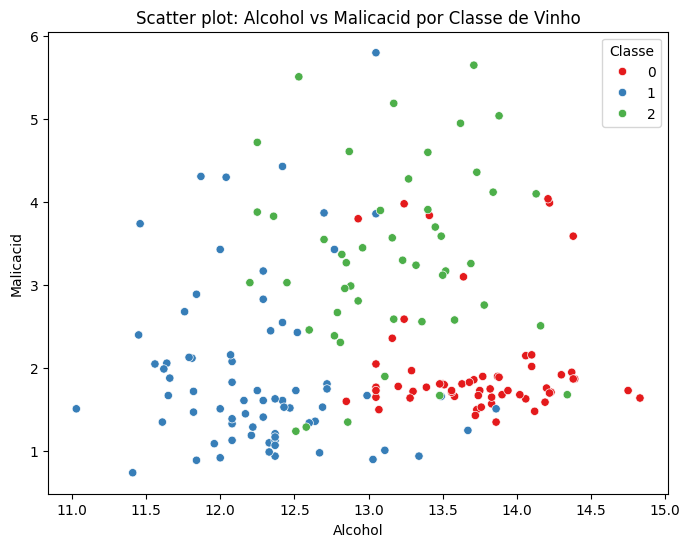

In [ ]:
import seaborn as sns

# Scatter plot de Alcohol vs Malicacid, colorindo por classe
plt.figure(figsize=(8,6))
sns.scatterplot(data=dados, x="Alcohol", y="Malicacid", hue="target", palette="Set1")
plt.title("Scatter plot: Alcohol vs Malicacid por Classe de Vinho")
plt.xlabel("Alcohol")
plt.ylabel("Malicacid")
plt.legend(title="Classe")
plt.show()

Na separação visual, observa-se que existe uma distinção entre as classes, apesar de embaralhar em alguns pontos. A Classe 0 tende a concentrar valores mais altos de Alcohol e mais baixos de Malicacid, enquanto a Classe 1 apresenta o padrão de Alcohol invertido, isto é, com valores de Malicacid baixo e valores de Alcohol baixo porém com pontos que apresentão valores de Malicacid mais elevados. Já a Classe 2 se posiciona em uma faixa intermediária, com sobreposição parcial em relação às demais.

Esses resultados indicam um padrão de diferenciação parcial entre os grupos, o que sugere que as variáveis Alcohol e Malicacid contribuem para a classificação dos vinhos, mas não são suficientes para separar completamente os três tipos. Além disso, percebe-se uma tendência inversa na relação entre as variáveis, porque vinhos com maior teor alcoólico tendem a apresentar menos Malicacid, especialmente nas Classes 0 e 1.

### Item 9

Construa um pairplot usando as variáveis __Alcohol__, __Flavanoids__, __Color_intensity__ e __Proline__, diferenciando os pontos por class. Visualize a relação entre pares de variáveis e identifique quais combinações de variáveis permitem melhor separação entre os tipos de vinho.

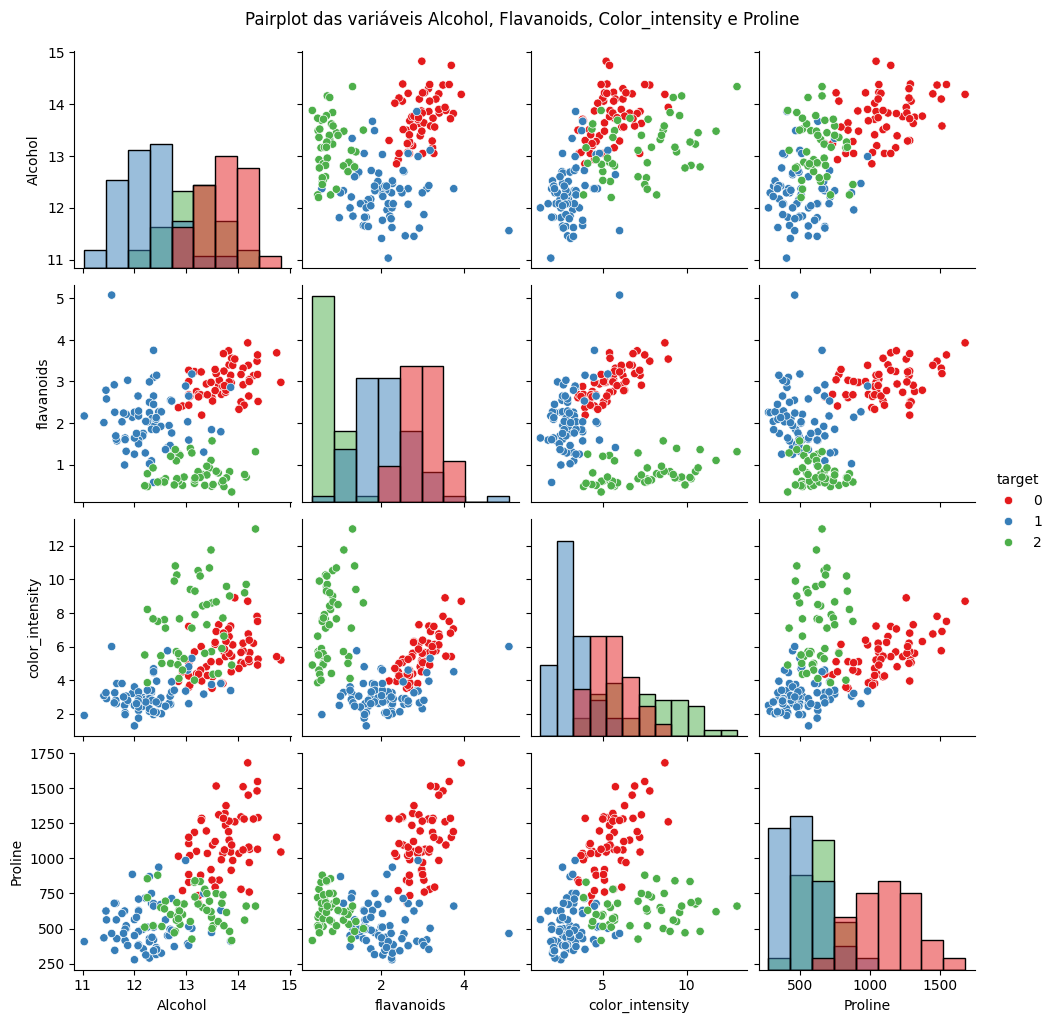

In [ ]:
# Pairplot para Alcohol, Flavanoids, Color_intensity e Proline diferenciando pelas classes
sns.pairplot(
    dados,
    vars=["Alcohol", "flavanoids", "color_intensity", "Proline"],
    hue="target",
    palette="Set1",
    diag_kind="hist"
)
plt.suptitle("Pairplot das variáveis Alcohol, Flavanoids, Color_intensity e Proline", y=1.02)
plt.show()

Na análise das relações entre pares de variáveis, observa-se que Flavanoids vs Proline e Flavanoids vs Alcohol apresentam boa separação entre as classes, com destaque para a distinção da Classe 1 em relação às demais. A relação entre Proline e Alcohol também mostra uma diferenciação razoável, uma vez que a Classe 0 se concentra em valores mais altos de Proline. Já a variável Color_intensity, isoladamente, não proporciona uma boa separação, mas quando combinada com outras auxilia na identificação da Classe 2.

Diante desses resultados, conclui-se que Proline e Flavanoids são as variáveis mais discriminativas entre os tipos de vinho. Isso indica que, em um modelo de classificação, a combinação dessas variáveis teria elevado poder preditivo.

### Item 10

Baseando-se nos gráficos gerados (boxplots, histogramas e scatter plots), descreva quais variáveis parecem ser mais relevantes para distinguir os três tipos de vinhos.  
Selecione ao menos duas visualizações e destaque as variáveis mais discriminantes e escreva uma breve conclusão sobre quais características químicas diferenciam as classes de vinho.

O boxplot da variável Proline evidenciou uma separação nítida entre as classes, sendo que a Classe 0 apresentou valores significativamente mais altos, a Classe 1 concentrou-se nos menores valores, enquanto a Classe 2 ocupou uma faixa intermediária. Isso reforça que Proline é uma variável altamente discriminante.

Na análise do pairplot envolvendo Alcohol, Flavanoids, Color_intensity e Proline, observou-se que Flavanoids diferencia de forma clara a Classe 1, que tende a apresentar valores mais baixos. Proline mais uma vez aparece como marcador relevante, especialmente ao separar a Classe 0 das demais. Junto a isso, Alcohol e Color_intensity também contribuem para a separação, mas com menor intensidade.

Portanto, as variáveis Proline e Flavanoids se destacam como as características químicas mais relevantes para distinguir os três tipos de vinhos, apresentando padrões de distribuição bem definidos entre as classes. Na prática, isso significa que as concentrações de Proline e Flavanoids são fatores determinantes na diferenciação química entre as variedades de vinho analisadas.